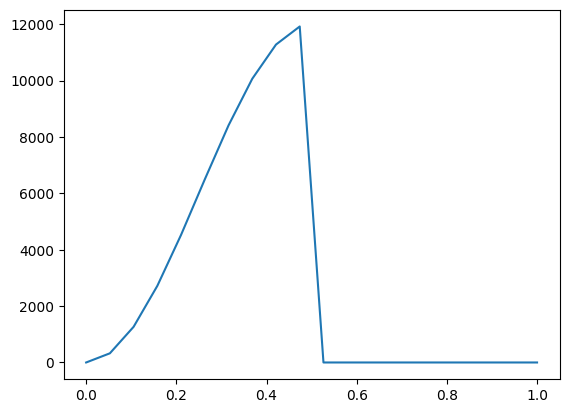

In [5]:
import numpy as np
import matplotlib.pyplot as plt
P_max=12000
T=1
t = np.linspace(0, T, 20)
tau=(t % T) / T
#f = 1e3 * np.sin(2*np.pi*t)
f = np.where(tau < 0.5, P_max * np.sin(np.pi * t/T)**2, 0.0)
plt.plot(t, f)
plt.show()

In [18]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import h5py as h5
import numpy as np

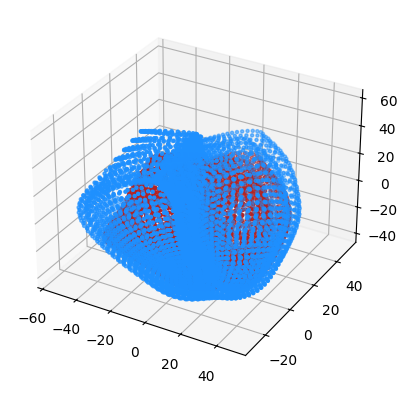

In [19]:
# read H5 file
pc = h5.File('UKBRVLV.h5', 'r')

# note that H5PY matrices in python are transposed

# generate the first principal mode
# with 1.5 times the standard deviation
S = np.transpose(pc['MU']) + (1.5 * np.sqrt(pc['LATENT'][0,0]) * pc['COEFF'][0,:])

# get ED & ES points, & convert to 3 columns matrix [x, y, z]
N = S.shape[1] // 2
ed = np.reshape(S[0,:N], (-1,3))
es = np.reshape(S[0,N:], (-1,3))

# plot ED points in blue
# plot ES points in red
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ed[:,0], ed[:,1], ed[:,2], color='dodgerblue', marker='.')
ax.scatter(es[:,0], es[:,1], es[:,2], color='firebrick', marker='.')